In [ ]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками

import scipy.stats as sts  # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Данные по 2019 году для анализа 
url_2019 = 'https://raw.githubusercontent.com/gulshatkd/Python-project-Hotel-Reservations/main/hotel_revenue_historical_2019.csv'

# Данные по 2020 году для гипотез
url_2020 = 'https://raw.githubusercontent.com/gulshatkd/Python-project-Hotel-Reservations/main/hotel_revenue_historical_full_2020.csv'

# Выводим данные по 2019 году
df = pd.read_csv(url_2019)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,20,2019,January,1,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,119.0,0,0,Canceled,12/22/2018
1,Resort Hotel,1,76,2019,January,1,1,1,2,2,...,No Deposit,240.0,NaN,0,Transient,57.9,0,1,Canceled,12/20/2018
2,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,11/16/2018
3,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,11/16/2018
4,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,11/16/2018


# Шаг 1 и: 2. Выбор темы и сбор данных

Для нашего проекта мы взяли тему: исследование процесса бронирования отелей на основе готовой базы данных, взятой по ссылке: https://www.kaggle.com/datasets/mashkuratualhassan/hotel-dataset. 

В ходе работы мы будем анализировать даты заезда, цены на номера, типы номеров, количество отмены и другую информацию, которая описана ниже. Постараемся построить различные диаграммы, проверить гипотезы, обучить модели для прогноза отмены бронирования.

# Шаг 3: Предварительная обработка

In [ ]:
df.shape # смотрим на размерность данных (кол-во строк, кол-во столбцов)

(79264, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Описание данных 


1) Индекс. 

2) Тип отеля (city hotel, resort hotel).

3) is_canceled - 1-бронирование отменилось, 0-бронирование не отменилось. 

4) lead_time - кол-во дней между датой бронирования и датой прибытия.

5) arrival_date_year - год заезда.

6) arrival_date_month - месяц заезда.

7) arrival_date_week_number - неделя заезда.

8) arrival_date_day_of_month - день заезда.

9) stays_in_weekend_nights - количество ночей, проведенных гостем в отеле, во время выходных.

10) stays_in_week_nights - количество ночей, проведенных гостем в отеле, в будние дни.

11) adults - количество взрослых.

12) children - количество детей.

13) babies - количество младенцев.

14) meal - тип завтрака: SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

15) country -страна происхождения.

16) market_segment  - тип бронирования: undefined, direct, groups, corporate, aviation, offline TA/TO - туристические агенты и операторы, online TA, complementary.

17) distribution_channel - канал осуществления операций. 

18) is_repeated_guest - 1 - гость приехал повторно, 0 - гость впервые.

19) previous_cancellations - количество предыдущих бронирований, отмененных клиентом до текущего бронирования.

20) previous_bookings_not_canceled - количество предыдущих бронирований, не отмененных клиентом до текущего бронирования.

21) reserved_room_type - тип забронированного номера.

22) assigned_room_type - код типа номера, присвоенного бронированию. Иногда присвоенный тип номера отличается от забронированного типа по причинам, связанным с работой отеля (например, из-за перебронирования) или по желанию клиента.

23) booking_changes - кол-во изменений в бронировании.

24) deposit_type - внес ли клиент депозит для гарантии бронирования. No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

25) agent - идентификатор туристического агентства, оформившего бронирование

26) company - идентификатор компании/организации, оформившей бронирование или ответственной за оплату бронирования.

27) days_in_waiting_list - кол-во дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту.

28) customer_type - тип бронирования. 

29) adr - средняя цена одной ночи в номере, определяемая путем деления суммы всех транзакций по размещению на общее количество ночей проживания.

30) required_car_parking_spaces - необходимое количество мест для парковки.

31) total_of_special_requests - количество особых просьб клиента (например, две односпальные кровати или верхний этаж). 

32) reservation_status - статус бронирования. Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

33) reservation_status_date - дата, когда был установлен последний статус. Эту переменную можно использовать в сочетании с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля.

In [ ]:
# вывод количества пропусков в каждом столбце
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             409
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10792
company                           74754


Мы видим, что присутсвуют пропуски в столбцах children, country, agent, company. 

Строки с пропусками в столбце country мы заменим на 'Unknown'.

Agent - если агентство не указано, скорее всего, бронирование было сделано без него, заменим на 0. То же самое с company и children.



In [ ]:
df['country'] = df['country'].fillna('Unknown')
df[['agent', 'company', 'children']] = df[['agent', 'company', 'children']].fillna('0')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,20,2019,January,1,1,0,2,2,...,No Deposit,240.0,0,0,Transient,119.0,0,0,Canceled,12/22/2018
1,Resort Hotel,1,76,2019,January,1,1,1,2,2,...,No Deposit,240.0,0,0,Transient,57.9,0,1,Canceled,12/20/2018
2,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018
3,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018
4,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018


In [ ]:
# проверим выполнение
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79264 entries, 0 to 79263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79264 non-null  object 
 1   is_canceled                     79264 non-null  int64  
 2   lead_time                       79264 non-null  int64  
 3   arrival_date_year               79264 non-null  int64  
 4   arrival_date_month              79264 non-null  object 
 5   arrival_date_week_number        79264 non-null  int64  
 6   arrival_date_day_of_month       79264 non-null  int64  
 7   stays_in_weekend_nights         79264 non-null  int64  
 8   stays_in_week_nights            79264 non-null  int64  
 9   adults                          79264 non-null  int64  
 10  children                        79264 non-null  object 
 11  babies                          79264 non-null  int64  
 12  meal                            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79264.000000,79264.000000,79264.0,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000
mean,0.365260,101.063459,2019.0,31.485378,15.813093,0.903474,2.450583,1.845630,0.008705,0.030531,0.125139,0.118818,0.210915,3.375467,95.000002,0.065982,0.516275
std,0.481506,105.946772,0.0,13.429799,8.738979,0.991648,1.879098,0.616085,0.104525,0.172044,1.025689,1.333111,0.634315,21.278640,48.273647,0.249165,0.757528
min,0.000000,0.000000,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2019.0,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000
50%,0.000000,65.000000,2019.0,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,157.000000,2019.0,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,1.000000
max,1.000000,737.000000,2019.0,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,58.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [ ]:
df.shape

(79264, 32)

In [ ]:
df['meal'].unique()

array(['BB', 'HB', 'Undefined', 'FB', 'SC'], dtype=object)

In [ ]:
# Undefined - это то же самое, что и SC, сделаем замену

df["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
# нужно проверить, нет ли бронирований без гостей 

df_filter = df.loc[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
df_filter

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
298,Resort Hotel,1,0,2019,February,8,15,0,0,0,...,No Deposit,0,383.0,0,Transient,0.0,0,0,Canceled,2/15/2019
4223,Resort Hotel,1,0,2019,November,48,21,0,0,0,...,No Deposit,0,386.0,0,Group,0.0,0,0,Canceled,11/21/2019
6677,City Hotel,1,173,2019,April,15,8,2,3,0,...,No Deposit,21.0,0,0,Transient-Party,0.0,0,0,Canceled,3/29/2019
10713,City Hotel,1,244,2019,July,28,6,2,4,0,...,No Deposit,19.0,0,0,Transient,0.0,0,0,Canceled,2/23/2019
10723,City Hotel,1,244,2019,July,28,6,2,4,0,...,No Deposit,19.0,0,0,Transient,0.0,0,0,Canceled,2/23/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78236,City Hotel,0,0,2019,December,52,24,0,0,0,...,No Deposit,28.0,0,0,Transient,0.0,0,0,Check-Out,12/24/2019
78237,City Hotel,0,0,2019,December,52,24,0,0,0,...,No Deposit,28.0,0,0,Transient,0.0,0,1,Check-Out,12/24/2019
78238,City Hotel,0,0,2019,December,52,24,0,0,0,...,No Deposit,28.0,0,0,Contract,0.0,0,0,Check-Out,12/24/2019
78239,City Hotel,0,0,2019,December,52,24,0,0,0,...,No Deposit,28.0,0,0,Transient,0.0,0,0,Check-Out,12/24/2019


In [ ]:
# Удалим такие бронирования

df = df.drop(df.loc[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index)

Для сравнения данных по отдельным типам отелей создадим отдельные датасеты для Resort hotel и  City Hotel

In [ ]:
# создание таблицы только с отелями типа resort
df_resort_all = df[df['hotel'] == 'Resort Hotel']

# Колонка с типом отеля больше не нужна, удалим
df_resort_all = df_resort_all.drop(['hotel'], axis=1)
df_resort_all.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,20,2019,January,1,1,0,2,2,2.0,...,No Deposit,240.0,0,0,Transient,119.0,0,0,Canceled,12/22/2018
1,1,76,2019,January,1,1,1,2,2,0.0,...,No Deposit,240.0,0,0,Transient,57.9,0,1,Canceled,12/20/2018
2,1,113,2019,January,1,2,0,1,2,0.0,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018
3,1,113,2019,January,1,2,0,1,2,0.0,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018
4,1,113,2019,January,1,2,0,1,2,0.0,...,Non Refund,305.0,0,0,Transient,72.0,0,0,Canceled,11/16/2018


In [ ]:
# создание таблицы только с отелями типа city
df_city_all =  df[df['hotel'] == 'City Hotel']

# Колонка с типом отеля больше не нужна, удалим
df_city_all = df_city_all.drop(['hotel'], axis=1)
df_city_all.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4817,1,119,2019,January,1,1,0,1,2,0.0,...,No Deposit,14.0,0,0,Transient,74.25,0,0,Canceled,12/31/2018
4818,1,25,2019,January,1,1,2,2,2,2.0,...,No Deposit,9.0,0,0,Transient,178.25,0,0,Canceled,12/7/2018
4819,1,150,2019,January,1,2,2,1,2,0.0,...,Non Refund,21.0,0,91,Transient,101.00,0,0,Canceled,11/4/2018
4820,1,150,2019,January,1,2,2,1,2,0.0,...,Non Refund,21.0,0,91,Transient,101.00,0,0,Canceled,11/4/2018
4821,1,150,2019,January,1,2,2,1,2,0.0,...,Non Refund,21.0,0,91,Transient,101.00,0,0,Canceled,11/4/2018


Для дальнейшего анализа мы будем использовать именно данные с неотмененными бронированиями (с некоторыми исключениями), так как отмененные бронирования не имеют ценности в контексте анализа актуальных данных.

In [ ]:
# Выделяю из датасетов df_resort_all и df_city_all только неотмененные бронирования

df_resort = df_resort_all[df_resort_all['is_canceled'] == 0]
df_city = df_city_all[df_city_all['is_canceled'] == 0]

## Гипотезы

В ходе нашей работы, мы будем проверять следующие гипотезы: 
- зависимость даты заезда, выбора месяца, дня месца от сезона
- зависимость цены номера от количества подростков, младенцев, наличия парковочного места, типа питания 
- зависимость отмены от наличия предыдущих бронирований, отмены предыдущих бронирований, изменений в бронировании, дней в листе ожидания
- как и какие мировые ситуации из разных сфер жизни влияют на те или иные перменные
- сравним показатели 2018, 2019 и 2020 годов и выявим закономерности роста или падения тех или иных показателй, проанализируем причины этого 


# Шаг 4. Визуализация

Главные вопросы:
- процентное распределение по странам
- сколько гости платят за ночь
- как менялась цена за ночь в течение года
- какой месяц был самым загруженным
- процентное распределение рыночного сегмента
- сколько было отмен бронирования 
- распределение количества отмен бронирования в течение года



In [ ]:
df_resort[['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country']]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,country
19669,2019,January,1,1,RUS
19670,2019,January,1,1,RUS
19671,2019,January,1,1,ARG
19672,2019,January,1,1,ARG
19673,2019,January,1,2,FRA
...,...,...,...,...,...
70829,2019,December,52,23,NLD
70830,2019,December,53,31,FRA
70831,2019,December,53,28,PRT
70832,2019,December,51,17,PRT


##Графики arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, country

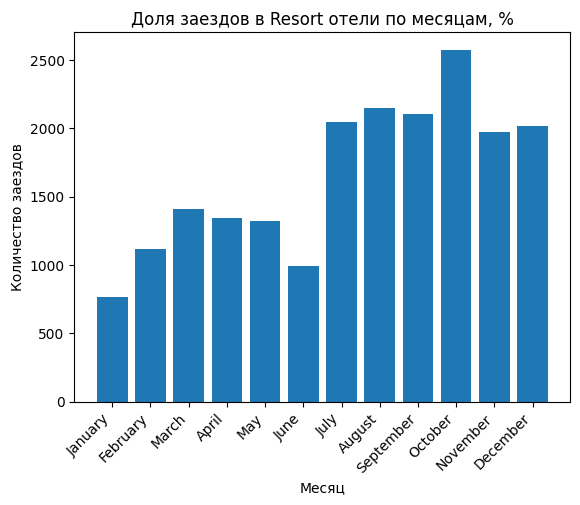

In [ ]:
# создание таблицы с количеством прибытий в каждый месяц
monthly_arrivals = df_resort.groupby('arrival_date_month').size()

# упорядочиваем значения по оси X
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_arrivals = monthly_arrivals.reindex(month_order)

# создание столбиковой диаграммы
plt.bar(monthly_arrivals.index, monthly_arrivals)
plt.title('Доля заездов в Resort отели по месяцам, %')
plt.xlabel('Месяц')
plt.ylabel('Количество заездов')
plt.xticks(rotation=45, ha='right')
plt.show()

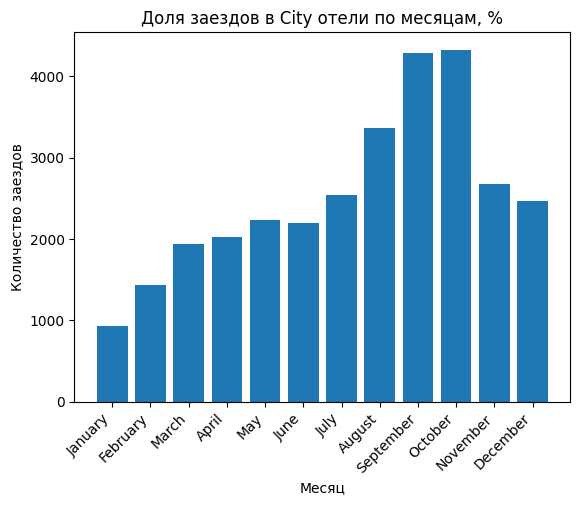

In [ ]:
# создание таблицы с количеством прибытий в каждый месяц
monthlyy_arrivals = df_city.groupby('arrival_date_month').size()

# упорядочиваем значения по оси X
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthlyy_arrivals = monthlyy_arrivals.reindex(month_order)

# создание столбиковой диаграммы
plt.bar(monthlyy_arrivals.index, monthlyy_arrivals)
plt.title('Доля заездов в City отели по месяцам, %')
plt.xlabel('Месяц')
plt.ylabel('Количество заездов')
plt.xticks(rotation=45, ha='right')
plt.show()

При создании круговой диаграммы с количеством посетителей по странам в процентном соотношении, мы удалили все страны, которые составляли менее 1%. Поскольку они не несли смысловой нагрузки. 

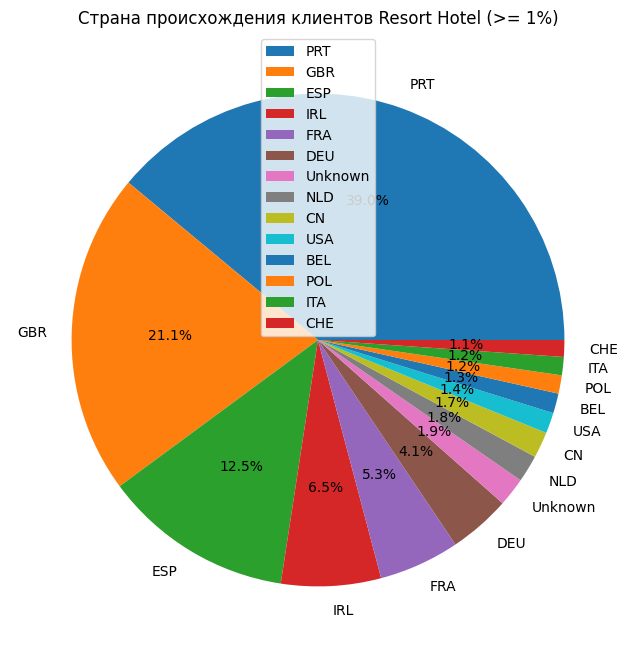

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

# подсчет количества наблюдений для каждой страны
country_counts = df_resort['country'].value_counts()

# вычисление процентного соотношения для каждой страны
country_percentages = country_counts / country_counts.sum() * 100

# фильтрация значений, составляющих менее 1% от общего количества наблюдений
filtered_countries = country_percentages[country_percentages >= 1]

# сортировка стран по убыванию
sorted_countries = filtered_countries.sort_values(ascending=False)

# создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sorted_countries, labels=sorted_countries.index, autopct='%.1f%%')
plt.title('Страна происхождения клиентов Resort Hotel (>= 1%)')

# добавление легенды с названиями стран по убыванию
plt.legend(sorted_countries.index, loc='best')

plt.show()

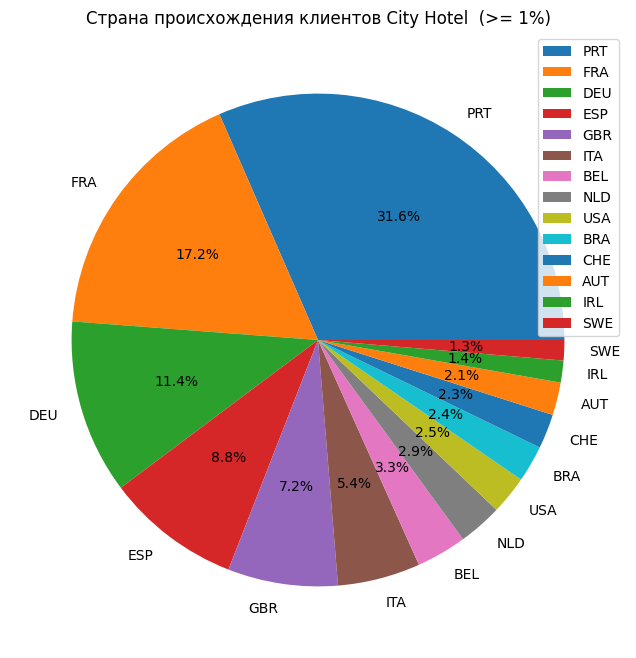

In [ ]:
# подсчет количества наблюдений для каждой страны
countryy_counts = df_city['country'].value_counts()

# вычисление процентного соотношения для каждой страны
countryy_percentages = countryy_counts / countryy_counts.sum() * 100

# фильтрация значений, составляющих менее 1% от общего количества наблюдений
filtered_countries = countryy_percentages[countryy_percentages >= 1]

# сортировка стран по убыванию
sorted_countries = filtered_countries.sort_values(ascending=False)

# создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sorted_countries, labels=sorted_countries.index, autopct='%.1f%%')
plt.title('Страна происхождения клиентов City Hotel  (>= 1%)')

# добавление легенды с названиями стран по убыванию
plt.legend(sorted_countries.index, loc='best')

plt.show()

## Теперь оценим, сколько в среднем гости платят за ночь: adr. 

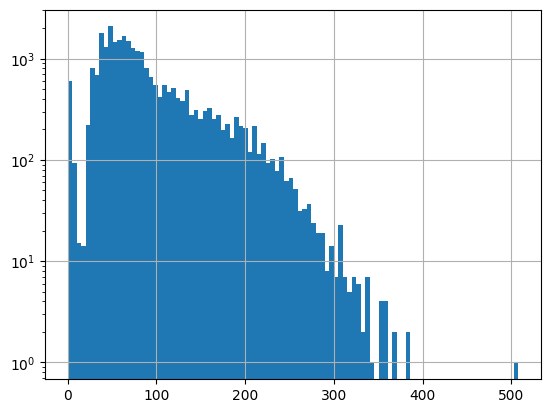

In [ ]:
# построим столбчатую диаграмму сколько платят за ночь, чтобы оценить выброс
df_resort['adr'].hist(log=True, bins=100);

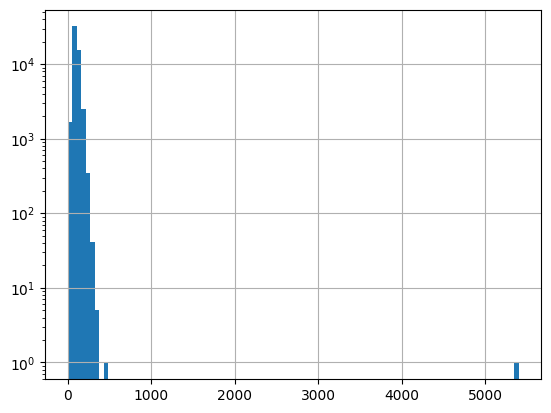

In [ ]:
df_city['adr'].hist(log=True, bins=100);

необходимо обработать выбросы, поскольку они искажают информацию

In [47]:
# Получение столбца adr для каждого типа отеля 
adr_resort = df_resort['adr']
adr_city = df_city['adr']

# Составление таблицы значений по возрастанию и фильтрация значений больше 1000, так как они искажают визуализацию на графиках
table_resort = adr_resort.sort_values().loc[adr_resort <= 1000].reset_index(drop = True)
table_city = adr_city.sort_values().loc[adr_city <= 1000].reset_index(drop = True)

print("Resort ADR:")
print (table_resort)

print("\nCity ADR")

Resort ADR:
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
19802    357.0
19803    359.0
19804    359.0
19805    367.0
19806    508.0
Name: adr, Length: 19807, dtype: float64

City ADR


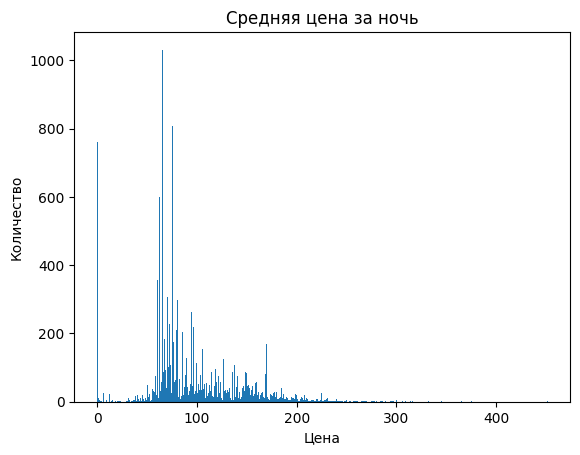

In [48]:
# создание столбчатой гистограммы для цены за ночь
moneyy = df_city['adr'].value_counts().sort_index()
plt.bar(moneyy.index, moneyy)
plt.title("Средняя цена за ночь")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()

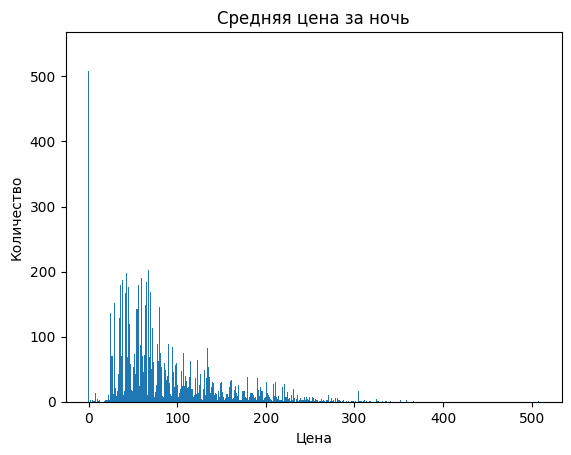

In [49]:
# создание столбчатой гистограммы для цены за ночь
money = df_resort['adr'].value_counts().sort_index()
plt.bar(money.index, money)
plt.title("Средняя цена за ночь")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()

## Оценим как менялась цена за ночь в течение года

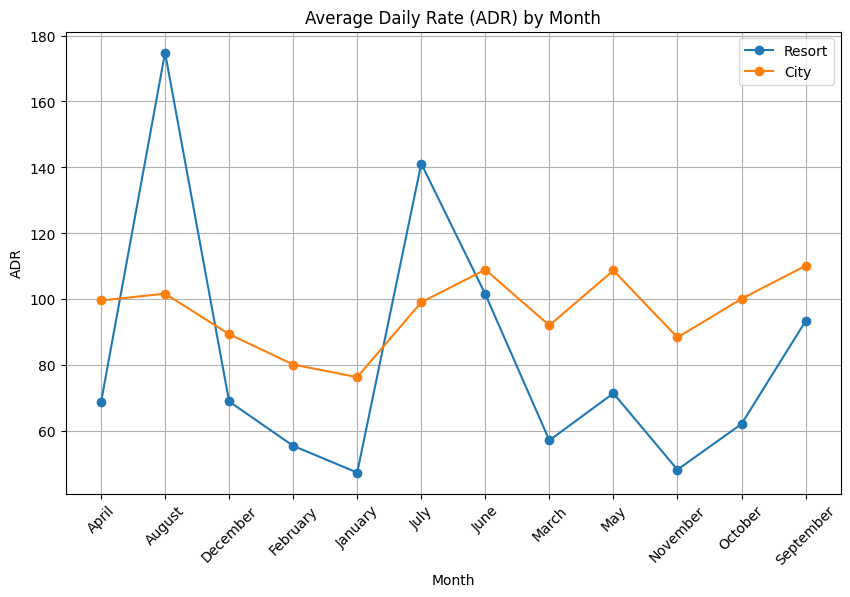

In [ ]:
# Группировка данных по месяцу и вычисление среднего значения ADR для каждого типа отелей
grouped_data_resort = df_resort.groupby("arrival_date_month")["adr"].mean()
grouped_data_city = df_city.groupby("arrival_date_month")["adr"].mean()

# Создание линейных диаграмм для каждого типа отелей
plt.figure(figsize=(10, 6))
plt.plot(grouped_data_resort.index, grouped_data_resort.values, marker="o", label="Resort")
plt.plot(grouped_data_city.index, grouped_data_city.values, marker="o", label="City")
plt.xlabel("Month")
plt.ylabel("ADR")
plt.title("Average Daily Rate (ADR) by Month")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Оценим market_segment

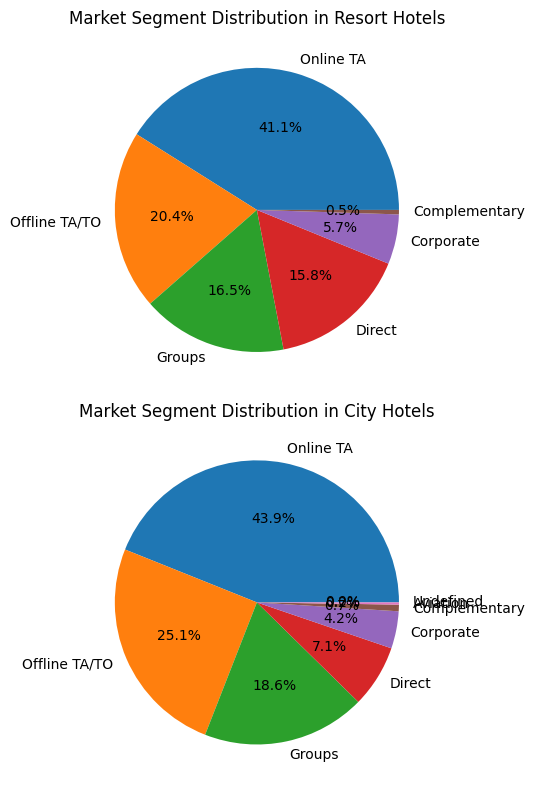

In [ ]:
#Подсчет количества наблюдений для каждого маркетингового сегмента по типу отеля
resort_segment_counts = df_resort["market_segment"].value_counts()
city_segment_counts = df_city["market_segment"].value_counts()

# Создание круговой диаграммы для распределения маркетингового сегмента по типу отеля
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.pie(resort_segment_counts, labels=resort_segment_counts.index, autopct='%.1f%%')
plt.title('Market Segment Distribution in Resort Hotels')

plt.subplot(2, 1, 2)
plt.pie(city_segment_counts, labels=city_segment_counts.index, autopct='%.1f%%')
plt.title('Market Segment Distribution in City Hotels')

plt.tight_layout()
plt.show()

##Составим ящики с усами для визуальзации зависимостей разных перемнных 

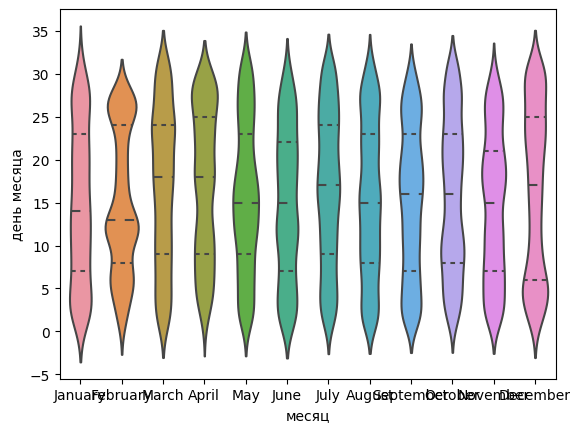

In [ ]:
sns.violinplot(x='arrival_date_month', 
               y='arrival_date_day_of_month', 
               data=df_resort, 
               inner="quartile")

plt.xlabel('месяц')
plt.ylabel('день месяца');

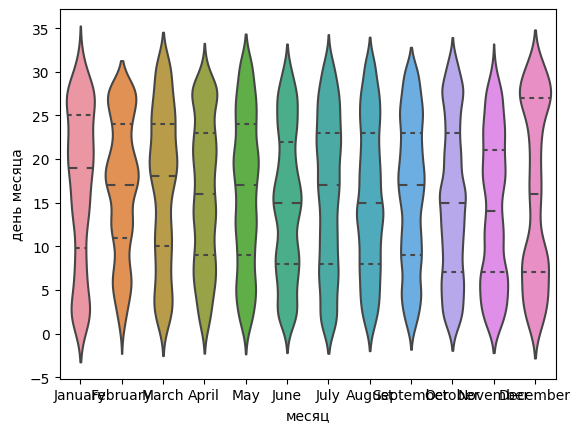

In [ ]:
sns.violinplot(x='arrival_date_month', 
               y='arrival_date_day_of_month', 
               data=df_city, 
               inner="quartile")

plt.xlabel('месяц')
plt.ylabel('день месяца');

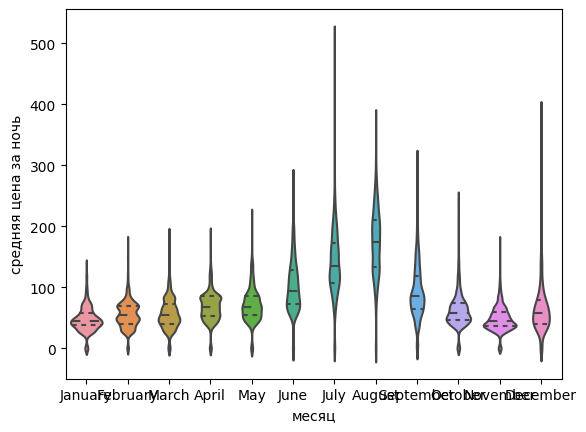

In [ ]:
sns.violinplot(x='arrival_date_month', 
               y='adr', 
               data=df_resort, 
               inner="quartile")

plt.xlabel('месяц')
plt.ylabel('средняя цена за ночь');

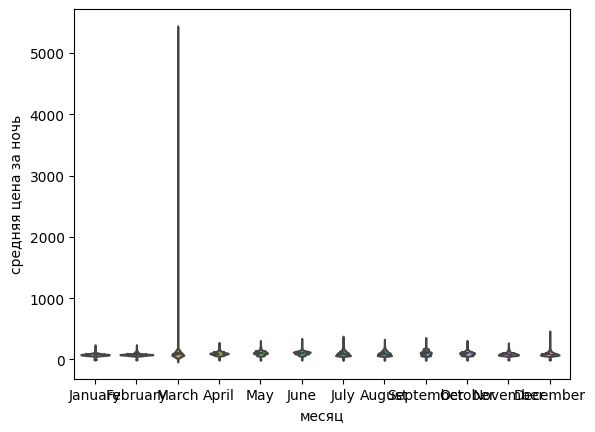

In [ ]:
sns.violinplot(x='arrival_date_month', 
               y='adr', 
               data=df_city, 
               inner="quartile")

plt.xlabel('месяц')
plt.ylabel('средняя цена за ночь');

## Проанализируем сколько было отмен

In [ ]:
# Получение уникальных значений в столбце "is_canceled"
unique_values = df_resort_all["is_canceled"].unique()

print(unique_values)

[1 0]


In [ ]:
# Получение уникальных значений в столбце "is_canceled"
uniquee_values = df_city_all["is_canceled"].unique()

print(uniquee_values)

[1 0]


In [ ]:
# Подсчет количества значений "1" в столбце "is_canceled"
count_cancelled = df_resort_all["is_canceled"].value_counts()[1]

# Вывод результата
print("Количество отмен:", count_cancelled)

Количество отмен: 7535


In [ ]:
# Подсчет количества значений "1" в столбце "is_canceled"
countt_cancelled = df_city_all["is_canceled"].value_counts()[1]

# Вывод результата
print("Количество отмен:", countt_cancelled)

Количество отмен: 21402


In [ ]:
# Подсчет количества значений "1" в столбце "is_canceled"
count_cancelled = df["is_canceled"].value_counts()[0]

# Вывод результата
print("Количество неотмененных бронирований", count_cancelled)

Количество неотмененных бронирований 50213


(-1.0999956335288472,
 1.0999997920728022,
 -1.0999992296537224,
 1.0999982832957877)

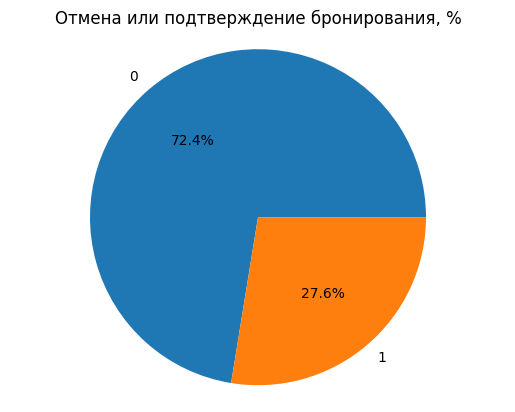

In [ ]:
# создание таблицы с отменой бронирования
cancel_ok = df_resort_all.groupby('is_canceled').size()

# создание круговой диаграммы
plt.pie(cancel_ok, labels=cancel_ok.index, autopct='%1.1f%%')
plt.title('Отмена или подтверждение бронирования, %')
plt.axis('equal')

(-1.099999731637542,
 1.0999999872208353,
 -1.0999909727591042,
 1.099998457730619)

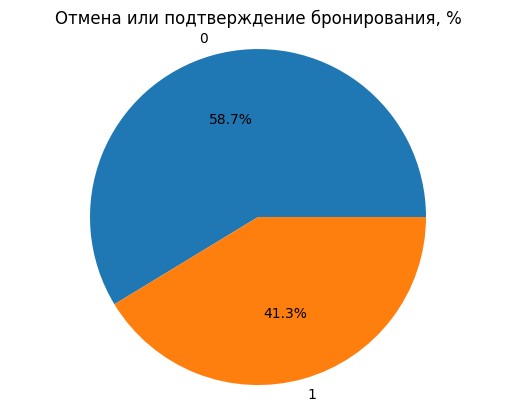

In [ ]:
# создание таблицы с отменой бронирования
cancell_ok = df_city_all.groupby('is_canceled').size()

# создание круговой диаграммы
plt.pie(cancell_ok, labels=cancell_ok.index, autopct='%1.1f%%')
plt.title('Отмена или подтверждение бронирования, %')
plt.axis('equal')

## Посмотрим количество отмен в течение года

<Figure size 1000x600 with 0 Axes>

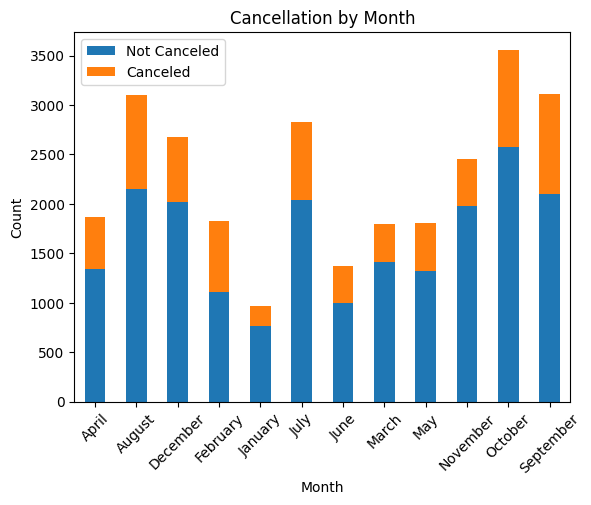

In [ ]:
# Группировка данных по месяцу и подсчет количества отмен и бронирований
grouped_data = df_resort_all.groupby("arrival_date_month")["is_canceled"].value_counts().unstack()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Cancellation by Month")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

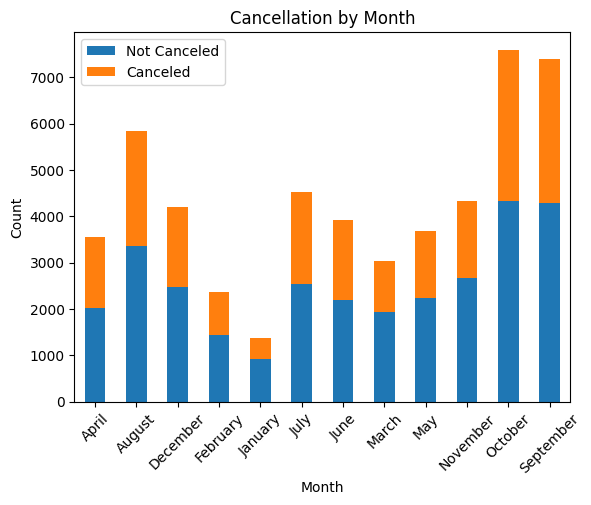

In [ ]:
# Группировка данных по месяцу и подсчет количества отмен и бронирований
groupedd_data = df_city_all.groupby("arrival_date_month")["is_canceled"].value_counts().unstack()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
groupedd_data.plot(kind="bar", stacked=True)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Cancellation by Month")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=45)
plt.show()

## Шаг 6. Проверка гипотез
В ходе нашей работы мы будем проверять следующие гипотезы

1) Вллияние короновируса на отдельную деятельность в ходе сравнения dataset-ов двух годов 2019 и 2020.

2) Зависимость даты заезда, выбора месяца, дня месяца от сезона, праздников.

3) Зависимость отмены от наличия предыдущих бронирований, отмены предыдущих бронирований, изменений в бронировании, количество дней нахождения в листе ожидания.

4) Влияние мировых ситуаций в различных сферах жизни общества на те или иные переменные, в том числе, инфляция, мировая экономика и торговля, политические взаимоотношения.

### Шаг 7. МО

Мы будем обучать модели для прогнозирования отмены бронирования. Это может помочь отелю для прогнозирования нагрузки, возможно с помощью такого прогноза отель сможет продавать больше номеров чем обычно и терять меньше денег на внезапных отменах бронирований.

Посмотрим на корреляционную матрицу

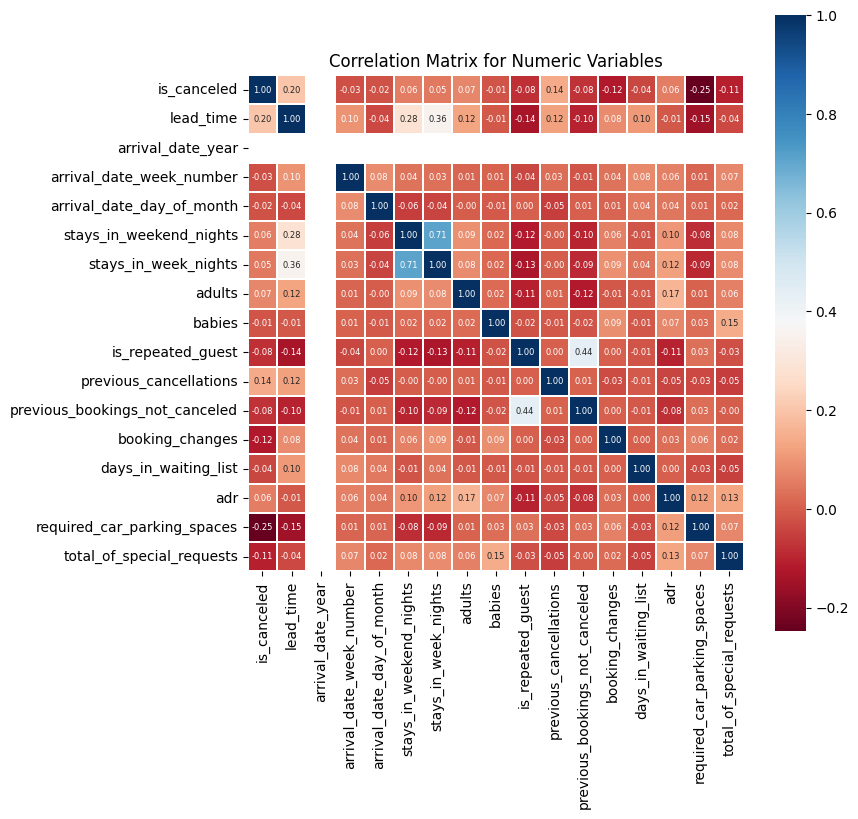

In [ ]:
# Выбираем столбцы с типами int64 и float64
colnames = df_resort.select_dtypes(include=['int64', 'float64']).columns

# Построение матрицы корреляции
correlation_matrix = df_resort[colnames].corr(method='pearson')

# Создание тепловой карты
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu",  annot_kws={"fontsize":6})
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

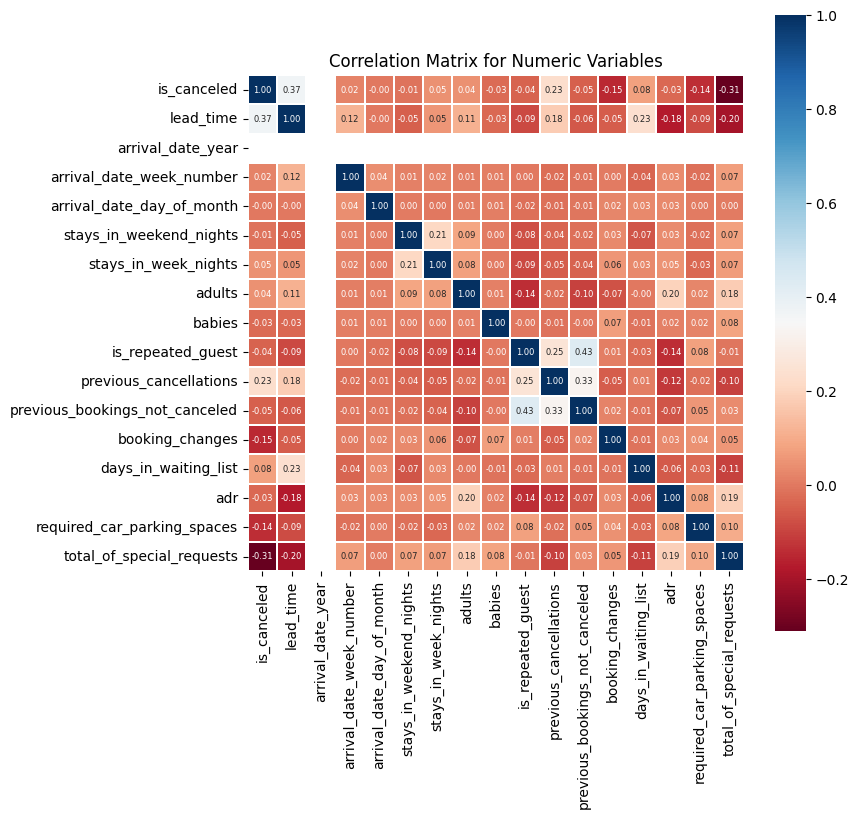

In [ ]:
# Выбираем столбцы с типами int64 и float64
colnamess = df_city.select_dtypes(include=['int64', 'float64']).columns

# Построение матрицы корреляции
correlation_matrix = df_city[colnamess].corr(method='pearson')

# Создание тепловой карты
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu",  annot_kws={"fontsize":6})
plt.title('Correlation Matrix for Numeric Variables')
plt.show()